In [22]:
#import  basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df=pd.read_csv('Dataset/phishing_site_urls.csv')

In [24]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [25]:
df.shape

(549346, 2)

In [26]:
df.info

<bound method DataFrame.info of                                                       URL Label
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3       mail.printakid.com/www.online.americanexpress....   bad
4       thewhiskeydregs.com/wp-content/themes/widescre...   bad
...                                                   ...   ...
549341                                    23.227.196.215/   bad
549342                                 apple-checker.org/   bad
549343                                  apple-iclods.org/   bad
549344                                 apple-uptoday.org/   bad
549345                                  apple-search.info   bad

[549346 rows x 2 columns]>

In [27]:
df.isnull()

,URL,Label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
549341,False,False
549342,False,False
549343,False,False
549344,False,False


In [28]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [29]:
df.Label.value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

In [30]:
!pip install nltk



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from nltk.tokenize import RegexpTokenizer

In [32]:
tokenizer=RegexpTokenizer(r'[A-Za-z]+')

In [33]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [34]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [35]:
df['text_tokenized']=df.URL.map(lambda t:tokenizer.tokenize(t))

In [36]:
df.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [37]:
from nltk.stem.snowball import SnowballStemmer

In [38]:
stemmer=SnowballStemmer('english')

In [39]:
df['text_stemmed']=df['text_tokenized'].map(lambda l:[stemmer.stem(word) for word in l])

In [40]:
df.head()

,URL,Label,text_tokenized,text_stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [41]:
df['text']=df['text_stemmed'].map(lambda l:' '.join(l))

In [42]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [43]:
good_sites=df[df.Label=='good']
bad_sites=df[df.Label=='bad']

In [44]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [45]:
def plot_wordcloud(text,mask=None,max_words=400, max_font_size=120,figure_size=(24.0,16.0),title=None,title_size=40,image_color=False):
    stopwords=set(STOPWORDS)
    more_stopwords={'com','http'}
    stopwords=stopwords.union(more_stopwords)
    wordcloud=WordCloud(background_color='white',
                        stopwords=stopwords,
                        max_words=max_words,
                        max_font_size=max_font_size,
                        random_state=42,
                        mask=mask)
    wordcloud.generate(text)
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors=ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="bilinear");
        plt.title(title,fontdict={'size':title_size,'verticalalignment':'bottom'})
    
    else:
        plt.imshow(wordcloud);
        plt.title(title,fontdict={'size':title_size,'color':'green','verticalalignment':'bottom'})
    plt.axis('off');
    plt.tight_layout()













    

In [ ]:
all_text=' '.join(good_sites['text'].tolist()) 

In [ ]:
from wordcloud import WordCloud

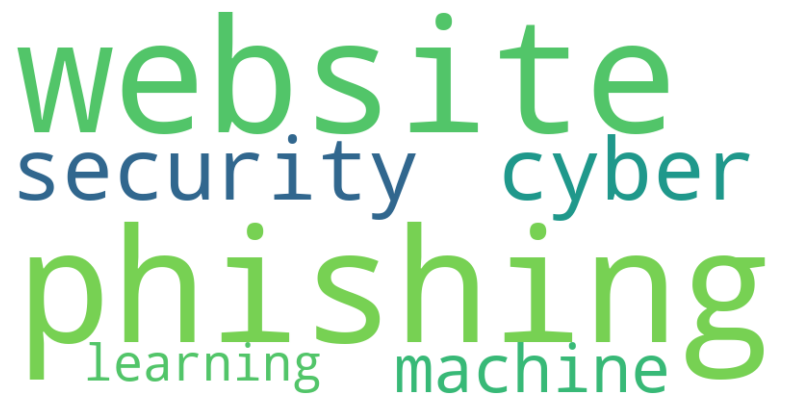

In [48]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "phishing website cyber security machine learning"

wc = WordCloud(width=800, height=400, background_color="white")
wc.generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


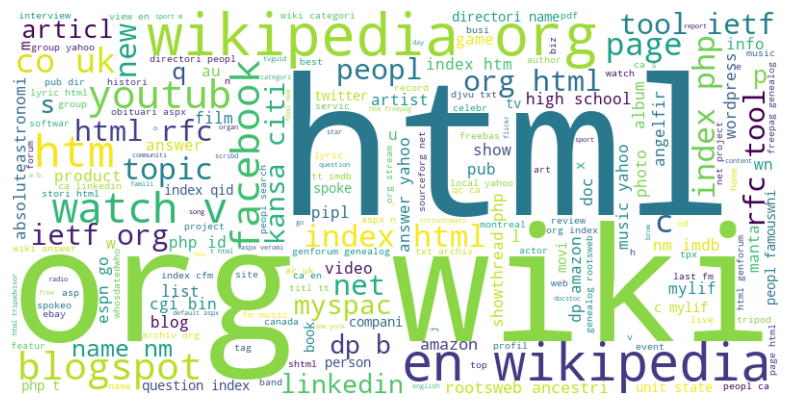

In [52]:
wordcloud= WordCloud(width=800,height=400,background_color='white').generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
cv=CountVectorizer()

In [56]:
features=cv.fit_transform(df.text)

In [58]:
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
from sklearn.model_selection import train_test_split


In [62]:
x_train,x_test,y_train,y_test=train_test_split(features,df.Label)

In [ ]:
##Model Training


In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
l_model=LogisticRegression()

In [66]:
l_model.fit(x_train,y_train)

C:\Users\priya sah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
l_model.score(x_test,y_test)

0.964743659756657

In [69]:
l_model.score(x_train,y_train)

0.9792091920322129

In [70]:
from sklearn.metrics import classification_report

In [73]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(l_model.predict(x_test),y_test,target_names=['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36540
        Good       0.99      0.96      0.98    100797

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.96      0.97    137337



In [75]:
from sklearn.metrics import confusion_matrix


In [77]:
con_mat = pd.DataFrame(confusion_matrix(l_model.predict(x_test),y_test),
                     columns=['Predicted:Bad','Predicted:Good'],
                       index=['Actual:Bad','Actual:Good']
                      )

In [78]:
import seaborn as sns

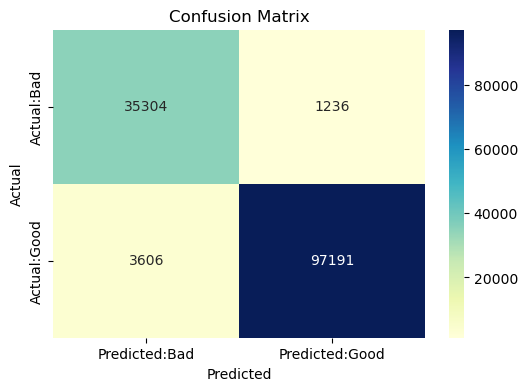

In [86]:
plt.close('all')

plt.figure(figsize=(6,4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [87]:
from sklearn.naive_bayes import MultinomialNB

In [88]:
mnb=MultinomialNB()

In [89]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [90]:
mnb.score(x_test,y_test)

0.9582850943300057

In [ ]:
###Save Model


In [92]:
import pickle

In [94]:
pickle.dump(l_model,open('phishing.pkl','wb'))

In [95]:
pickle.dump(cv,open('vectorizer.pkl','wb'))

In [102]:
pickle.dump(cv,open('vectorizer.pkl','wb'))

In [96]:
predict_bad=['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php',

'fazan-pacir.rs/temp/libraries/ipad',

'tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt'
]
predict_good=[
'youtube.com/',

'youtube.com/watch?v=qI0TQJI3vdU',

'retailhellunderground.com/',

'restorevisioncenters.com/html/technology.html']

In [97]:
predict_good=cv.transform(predict_good)

In [98]:
predict_bad=cv.transform(predict_bad)

In [99]:
l_model.predict(predict_good)

array(['good', 'good', 'good', 'good'], dtype=object)

In [100]:
l_model.predict(predict_bad)

array(['bad', 'bad', 'bad', 'bad'], dtype=object)

In [101]:
mnb.predict(predict_good)

array(['good', 'good', 'good', 'good'], dtype='<U4')